In [71]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
import random
import numpy as np
from math import pi
#IBMQ.load_account()

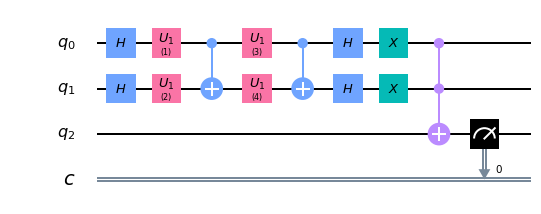

In [80]:
def Qcir(x1, x2, w1, w2):
    q = QuantumRegister(3, 'q')
    c = ClassicalRegister(1, 'c')
    qc = QuantumCircuit(q, c)
    
    qc.h(q[0])
    qc.h(q[1])
    qc.u1(x1, q[0])
    qc.u1(x2, q[1])
    qc.cx(q[0], q[1])
    
    qc.u1(w1, q[0])
    qc.u1(w2, q[1])
    
    qc.cx(q[0], q[1])
    
    qc.h(q[0])
    qc.h(q[1])
    qc.x(q[0])
    qc.x(q[1])
    
    qc.ccx(q[0], q[1], q[2])
    
    
    qc.measure(q[2], c[0])
    
    return qc

qc = Qcir(1, 2, 3, 4)
qc.draw(output='mpl')


In [87]:
def gendata(num):
        ret = []
        for i in range(num):
            x1 = random.uniform(-1, 1)
            x2 = random.uniform(-1, 1)
            if x1 * x2 >= 0:
                y = 1
            else:
                y = 0
            ret.append((x1, x2, y))
        return ret
train = gendata(100)
test = gendata(100)

In [88]:
def evaluate(w1, w2, data):
    c = 0
    for x1, x2, y in data:
        qc = Qcir(x1, x2, w1, w2)
        backend = Aer.get_backend('qasm_simulator')
        job = execute(qc, backend, shots=1024)
        result = job.result()
        count =result.get_counts()
        if '1' not in count:
            z = 0
        elif '0' not in count:
            z = 1
        elif count['0'] > count['1']:
            z = 0
        else:
            z = 1
        # print('expected', y, ', actual', z)
        if y == z:
            c += 1
    return c / len(data)

evaluate(2, 0.5, train)

0.54

In [89]:
def search(step):
    result = []
    W = np.arange(-pi, pi, step)
    for w1 in W:
        for w2 in W:
            result.append((evaluate(w1, w2, train), w1, w2))
            print(result[-1])
    return result

In [90]:
result = search(1)

(0.51, -3.141592653589793, -3.141592653589793)
(0.51, -3.141592653589793, -2.141592653589793)
(0.51, -3.141592653589793, -1.1415926535897931)
(0.51, -3.141592653589793, -0.14159265358979312)
(0.51, -3.141592653589793, 0.8584073464102069)
(0.51, -3.141592653589793, 1.8584073464102069)
(0.51, -3.141592653589793, 2.858407346410207)
(0.51, -2.141592653589793, -3.141592653589793)
(0.51, -2.141592653589793, -2.141592653589793)
(0.51, -2.141592653589793, -1.1415926535897931)
(0.49, -2.141592653589793, -0.14159265358979312)
(0.49, -2.141592653589793, 0.8584073464102069)
(0.51, -2.141592653589793, 1.8584073464102069)
(0.51, -2.141592653589793, 2.858407346410207)
(0.51, -1.1415926535897931, -3.141592653589793)
(0.51, -1.1415926535897931, -2.141592653589793)
(0.49, -1.1415926535897931, -1.1415926535897931)
(0.47, -1.1415926535897931, -0.14159265358979312)
(0.44, -1.1415926535897931, 0.8584073464102069)
(0.51, -1.1415926535897931, 1.8584073464102069)
(0.51, -1.1415926535897931, 2.858407346410207)


In [91]:
m = max(result)
print(m)

(0.58, 0.8584073464102069, -1.1415926535897931)


In [92]:
evaluate(m[1], m[2], test)

0.49